In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

import warnings 
warnings.filterwarnings('ignore')

### Importing The DataSet

In [2]:
df_temp = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")

In [3]:
pd.set_option('display.max_column',99)

In [4]:
df_temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df_temp.shape #checking the shape

(7752, 25)

DataSet Contains 7752 rows and 25 columns.

In [6]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
df_temp.describe() # checking the statistical info

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [8]:
df_temp.isnull().sum()*df_temp.shape[1]/100 #checking the null values percentage

station              0.50
Date                 0.50
Present_Tmax        17.50
Present_Tmin        17.50
LDAPS_RHmin         18.75
LDAPS_RHmax         18.75
LDAPS_Tmax_lapse    18.75
LDAPS_Tmin_lapse    18.75
LDAPS_WS            18.75
LDAPS_LH            18.75
LDAPS_CC1           18.75
LDAPS_CC2           18.75
LDAPS_CC3           18.75
LDAPS_CC4           18.75
LDAPS_PPT1          18.75
LDAPS_PPT2          18.75
LDAPS_PPT3          18.75
LDAPS_PPT4          18.75
lat                  0.00
lon                  0.00
DEM                  0.00
Slope                0.00
Solar radiation      0.00
Next_Tmax            6.75
Next_Tmin            6.75
dtype: float64

In the data set there are many columns where values are missing in 17% to 18%.

#### NaN Treatment:

Imputing NaN values using simple imputer and removeing 'station' , 'Date' columns as it is no use in order to make predictions.

In [9]:
from sklearn.impute import SimpleImputer # importing libaraby

In [10]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean') # using strategy as 'mean' for nan treatment

In [11]:
df_temp[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax']] = imputer.fit_transform(df_temp[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax']])

In [12]:
df_temp[['LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH']] = imputer.fit_transform(df_temp[['LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH']])

In [13]:
df_temp[['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']] = imputer.fit_transform(df_temp[['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']])

In [14]:
df_temp[['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Next_Tmax','Next_Tmin']] = imputer.fit_transform(df_temp[['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Next_Tmax','Next_Tmin']])

In [15]:
df_temp = df_temp.drop(df_temp[['station','Date']],axis=1) # removing the 2 columns 'station','Date'

In [16]:
df_temp.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

### Exploratry Data Analysis :

In [17]:
sns.set(style='darkgrid') # setting the style 

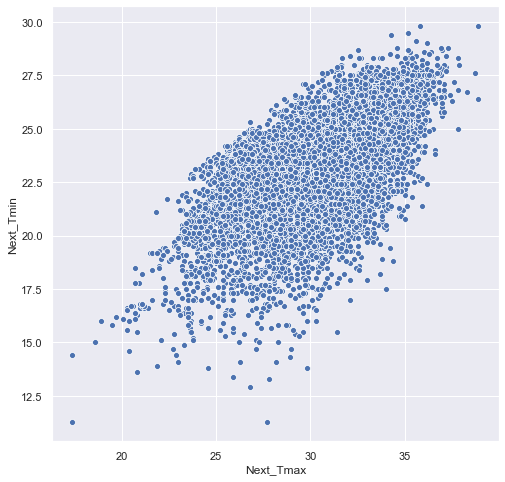

In [18]:
#checking the relation between Next_Tmin and Next_Tmin
plt.figure(figsize=(8,8))
sns.scatterplot(x='Next_Tmax',y='Next_Tmin',data=df_temp)

<Figure size 576x576 with 0 Axes>

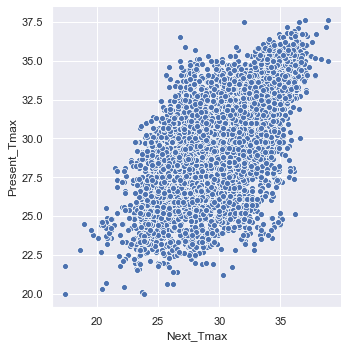

In [19]:
#checking the relation between Next_Tmin and Present_Tmax
plt.figure(figsize=(8,8))
sns.relplot(x='Next_Tmax',y='Present_Tmax',data=df_temp)

<Figure size 576x576 with 0 Axes>

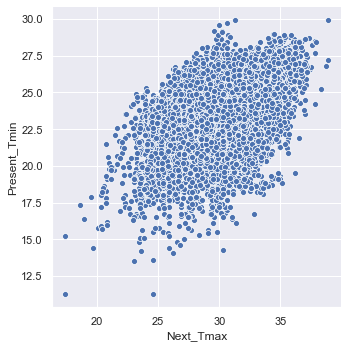

In [20]:
#checking the relation between Next_Tmin and Present_Tmin
plt.figure(figsize=(8,8))
sns.relplot(x='Next_Tmax',y='Present_Tmin',data=df_temp)

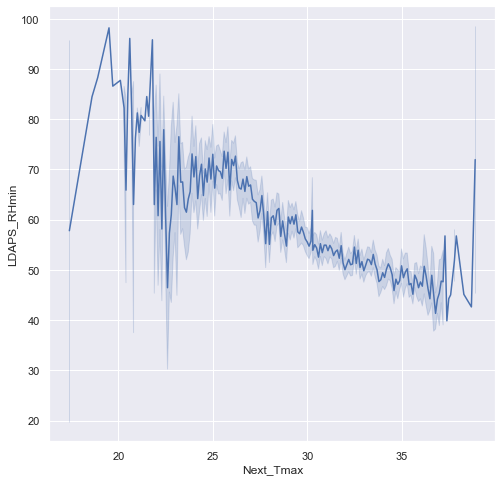

In [21]:
#checking the relation between Next_Tmin and LDAPS_RHmin
plt.figure(figsize=(8,8))
sns.lineplot(x='Next_Tmax',y='LDAPS_RHmin',data=df_temp)

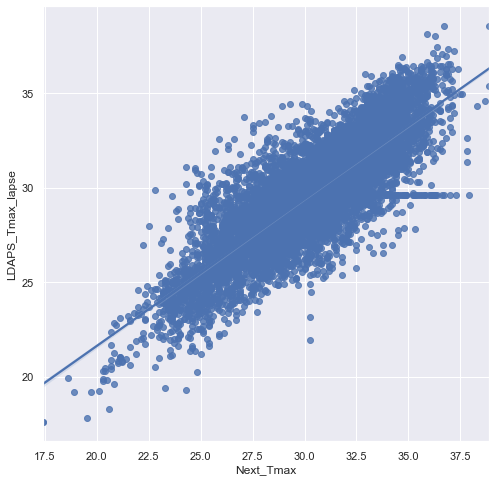

In [22]:
#checking the relation between Next_Tmin and LDAPS_Tmax_lapse
plt.figure(figsize=(8,8))
sns.regplot(x='Next_Tmax',y='LDAPS_Tmax_lapse',data=df_temp)

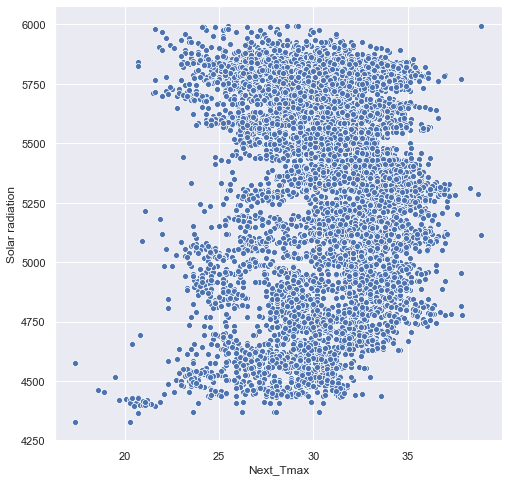

In [23]:
#checking the relation between Next_Tmin and Solar radiation
plt.figure(figsize=(8,8))
sns.scatterplot(x='Next_Tmax',y='Solar radiation',data=df_temp)

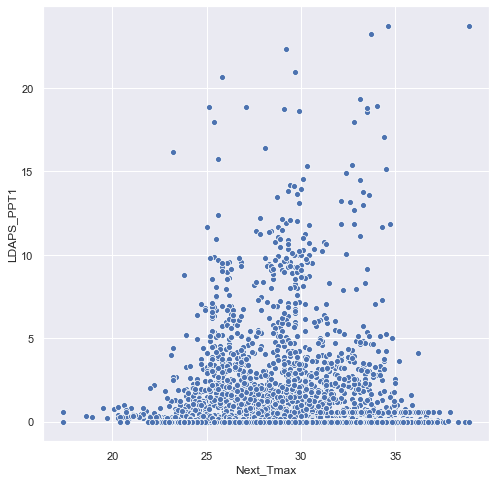

In [24]:
#checking the relation between Next_Tmin and LDAPS_PPT1
plt.figure(figsize=(8,8))
sns.scatterplot(x='Next_Tmax',y='LDAPS_PPT1',data=df_temp)

<Figure size 576x576 with 0 Axes>

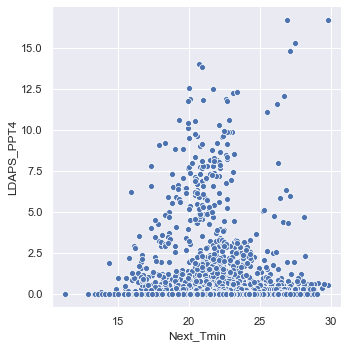

In [25]:
#checking the relation between Next_Tmin and Slope
plt.figure(figsize=(8,8))
sns.relplot(x='Next_Tmin',y='LDAPS_PPT4',data=df_temp)

Checking correlation using heat map

In [26]:
corrrelation = df_temp.corr()

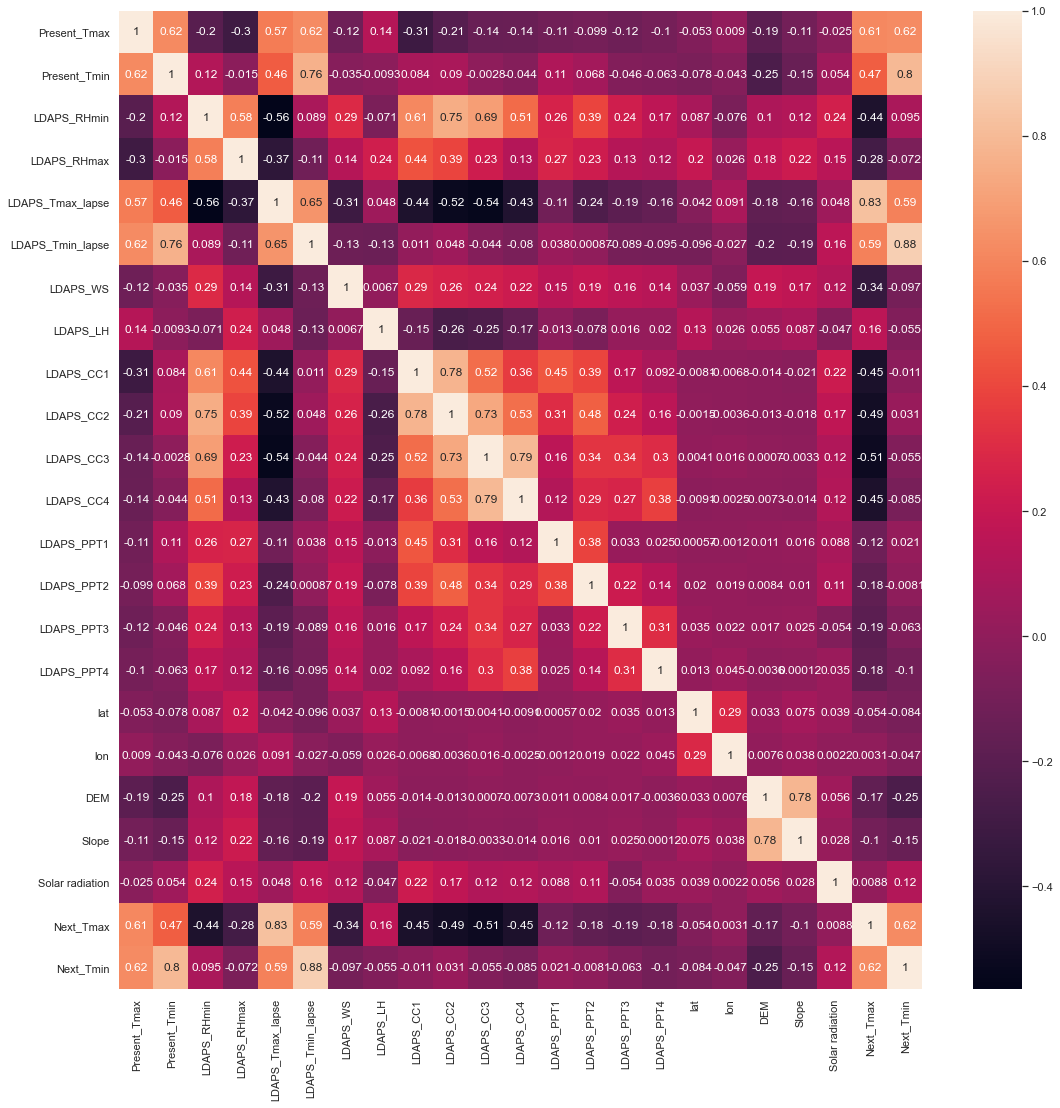

In [27]:
plt.figure(figsize=(18,18))
sns.heatmap(corrrelation,annot=True)

There are columns like 'Next_Tmax' ,'Next_Tmin','LDAPS_RHmin','LDAPS_RHmax' seems correlated and many columns like 'lat','lon',
'DEM' showing negatively correlated with label data.Howevwe will cehck the in the feature selection techniques which are features is impecting most.

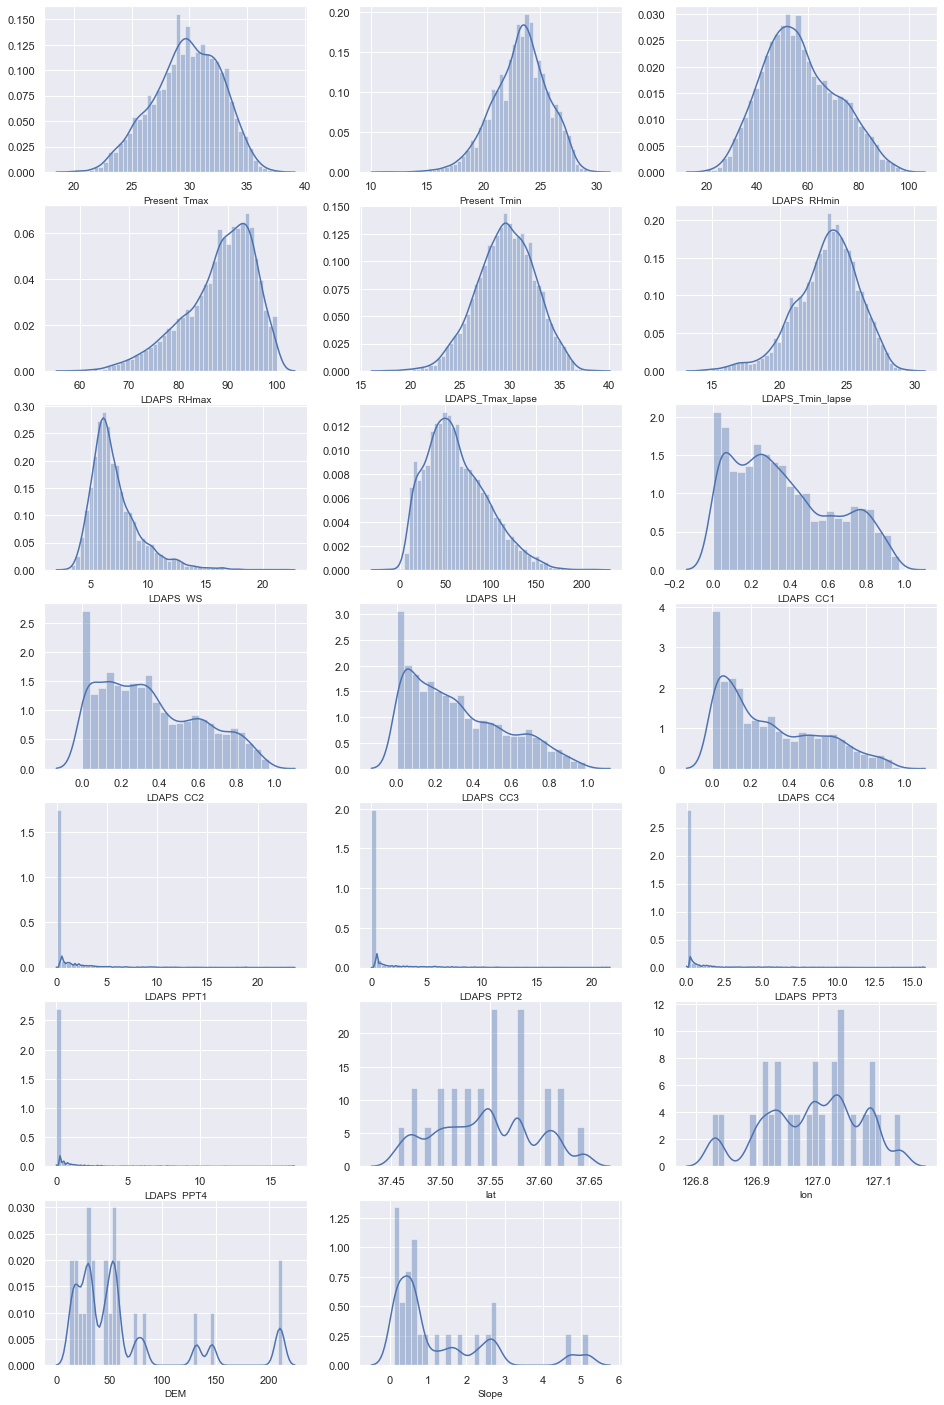

In [28]:
# Checking the distribution of data
plt.figure(figsize=(16,25))
plotnumber=1
for column in df_temp:
    if plotnumber <=20:
        plt.subplot(7,3,plotnumber)
        sns.distplot(df_temp[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

### Outliars Detection and Removel :

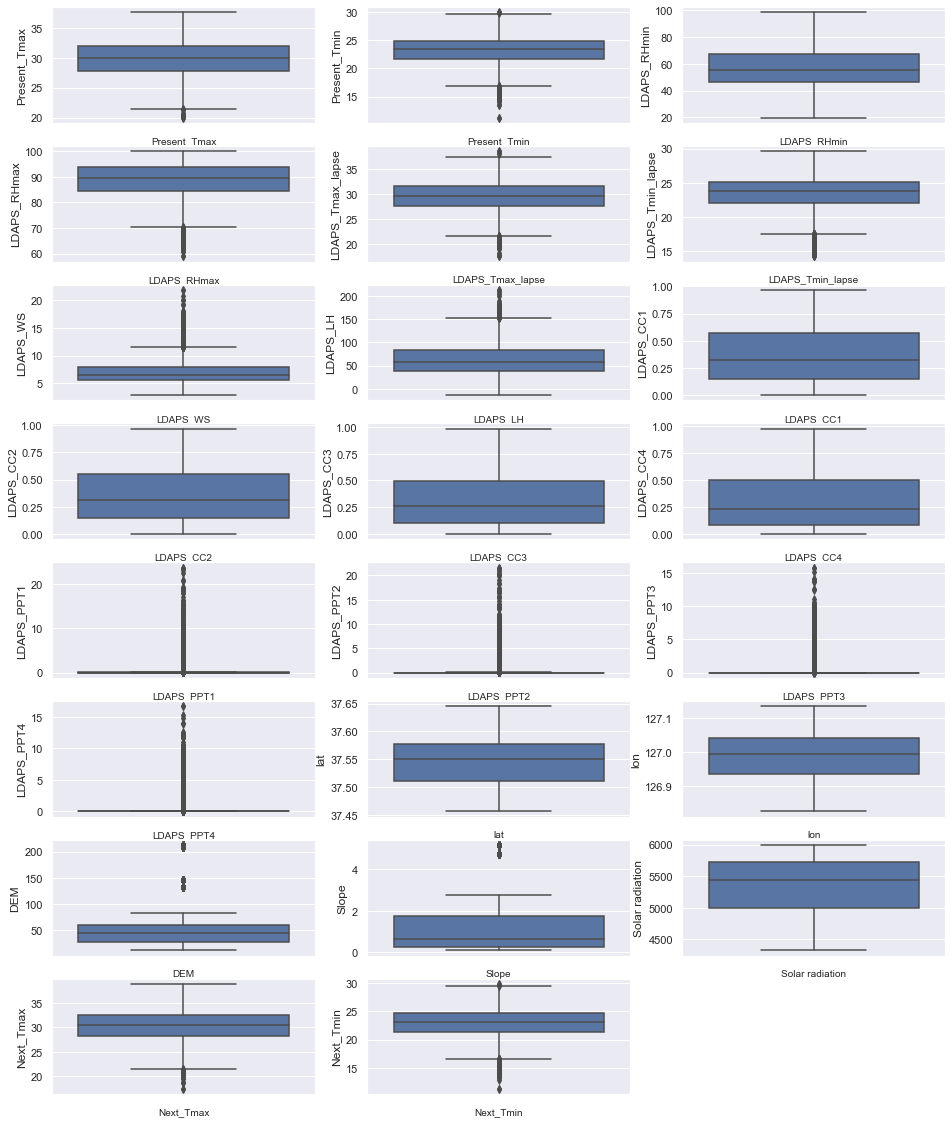

In [29]:
# Checking the distribution of data
plt.figure(figsize=(16,20))
plotnumber=1
for column in df_temp:
    if plotnumber <=24:
        plt.subplot(8,3,plotnumber)
        sns.boxplot(df_temp[column],orient='v')
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

In [30]:
# from scipy.stats import zscore # using z score for outliar removel

In [31]:
# z_score = zscore(df_temp[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Next_Tmax','Next_Tmin']])
# abs_values = np.abs(z_score)
# filtter_values = (abs_values<2).all(axis=1)
# df_temp = df_temp[filtter_values]

In [32]:
# df_temp.shape

In [33]:
from sklearn.preprocessing import PowerTransformer # using power transformation for remove the skewness

In [34]:
power = PowerTransformer(method='yeo-johnson')

In [35]:
df_temp['Present_Tmax'] = power.fit_transform(df_temp['Present_Tmax'].values.reshape(-1,1))
df_temp['Present_Tmin'] = power.fit_transform(df_temp['Present_Tmin'].values.reshape(-1,1))
df_temp['LDAPS_RHmax'] = power.fit_transform(df_temp['LDAPS_RHmax'].values.reshape(-1,1))
df_temp['LDAPS_Tmax_lapse'] = power.fit_transform(df_temp['LDAPS_Tmax_lapse'].values.reshape(-1,1))
df_temp['LDAPS_Tmin_lapse'] = power.fit_transform(df_temp['LDAPS_Tmin_lapse'].values.reshape(-1,1))
df_temp['LDAPS_WS'] = power.fit_transform(df_temp['LDAPS_WS'].values.reshape(-1,1))
df_temp['LDAPS_LH'] = power.fit_transform(df_temp['LDAPS_LH'].values.reshape(-1,1))
df_temp['LDAPS_CC1'] = power.fit_transform(df_temp['LDAPS_CC1'].values.reshape(-1,1))
df_temp['LDAPS_PPT1'] = power.fit_transform(df_temp['LDAPS_PPT1'].values.reshape(-1,1))
df_temp['LDAPS_PPT2'] = power.fit_transform(df_temp['LDAPS_PPT2'].values.reshape(-1,1))
df_temp['LDAPS_PPT3'] = power.fit_transform(df_temp['LDAPS_PPT3'].values.reshape(-1,1))
df_temp['LDAPS_PPT4'] = power.fit_transform(df_temp['LDAPS_PPT4'].values.reshape(-1,1))
df_temp['DEM'] = power.fit_transform(df_temp['DEM'].values.reshape(-1,1))
df_temp['Slope'] = power.fit_transform(df_temp['Slope'].values.reshape(-1,1))
df_temp['Next_Tmax'] = power.fit_transform(df_temp['Next_Tmax'].values.reshape(-1,1))
df_temp['Next_Tmin'] = power.fit_transform(df_temp['Next_Tmin'].values.reshape(-1,1))

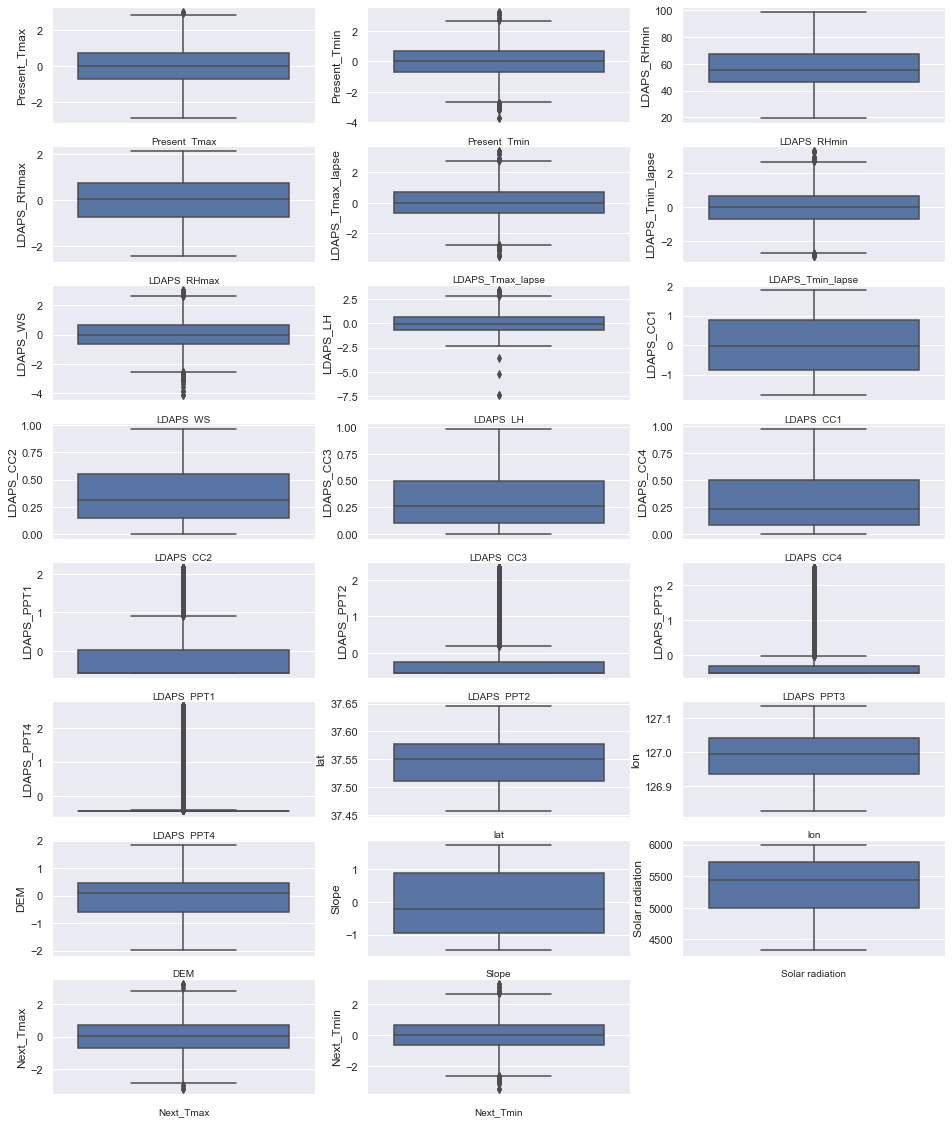

In [36]:
plt.figure(figsize=(16,20))
plotnumber=1
for column in df_temp:
    if plotnumber <=24:
        plt.subplot(8,3,plotnumber)
        sns.boxplot(df_temp[column],orient='v')
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

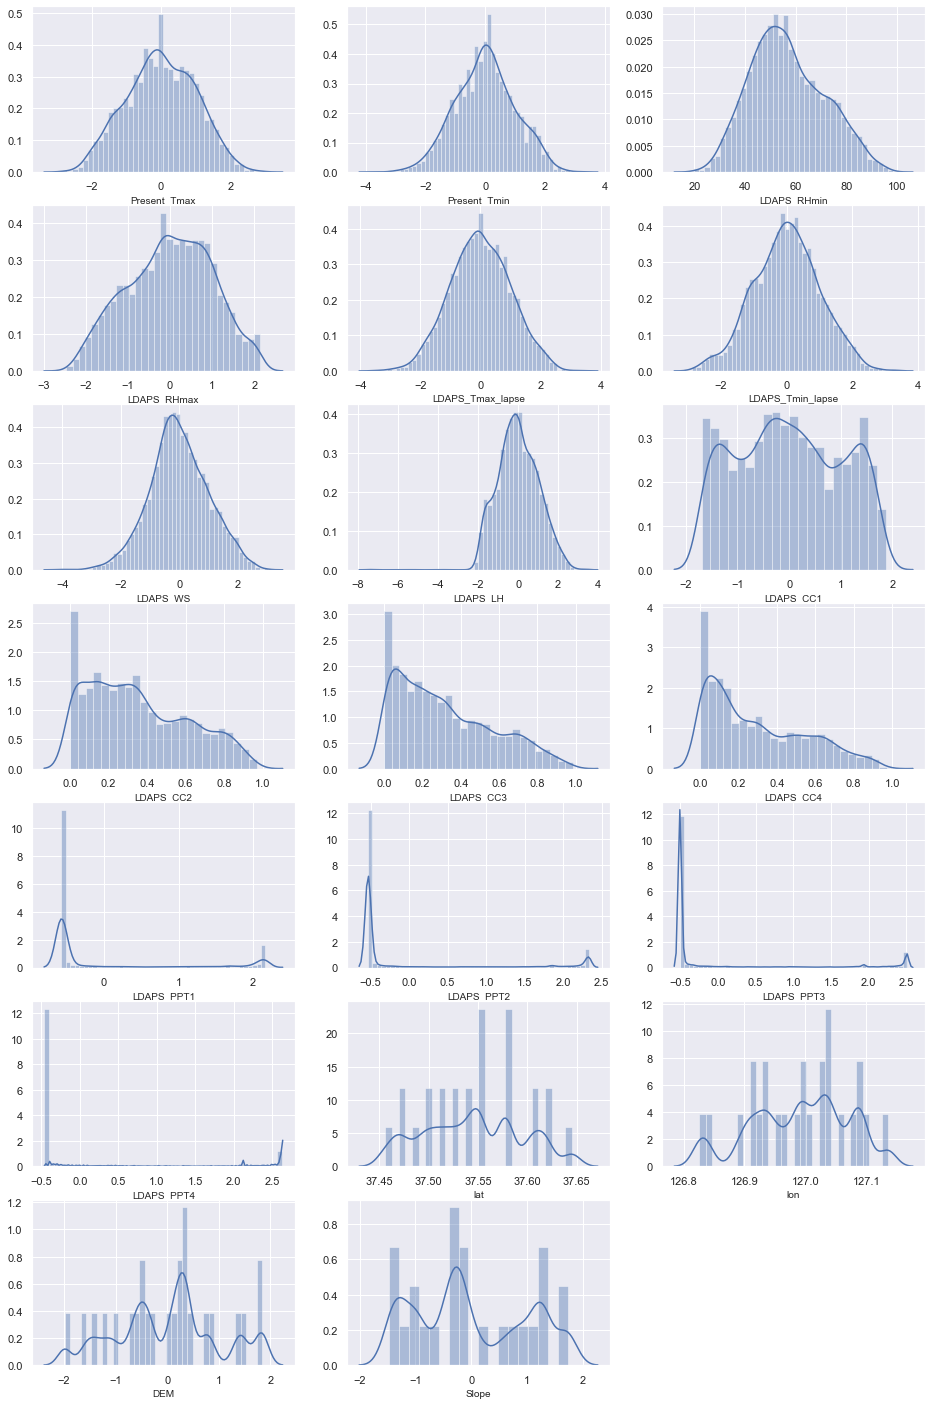

In [37]:
# Checking the distribution of data
plt.figure(figsize=(16,25))
plotnumber=1
for column in df_temp:
    if plotnumber <=20:
        plt.subplot(7,3,plotnumber)
        sns.distplot(df_temp[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

## Feature Engineering:

##### Feature Selection :

In [38]:
from sklearn.ensemble import ExtraTreesRegressor #using 'ExtraTreesClassifier' for feature selection

In [39]:
X_feature = df_temp.drop(columns=['Next_Tmax'],axis=1) 
y_feature = df_temp['Next_Tmax']

In [40]:
model = ExtraTreesRegressor()

In [41]:
model.fit(X_feature,y_feature)

ExtraTreesRegressor()

In [42]:
print(model.feature_importances_)

[0.09353834 0.01859612 0.02270039 0.00929037 0.38827951 0.04803246
 0.01868177 0.01089631 0.02838758 0.04482674 0.07113466 0.02803633
 0.01583689 0.0158513  0.01249782 0.01367966 0.00550803 0.00610595
 0.00611089 0.00482897 0.02209097 0.11508894]


In [43]:
fearures_rank = pd.Series(model.feature_importances_,index=X_feature.columns)
fearures_rank

Present_Tmax        0.093538
Present_Tmin        0.018596
LDAPS_RHmin         0.022700
LDAPS_RHmax         0.009290
LDAPS_Tmax_lapse    0.388280
LDAPS_Tmin_lapse    0.048032
LDAPS_WS            0.018682
LDAPS_LH            0.010896
LDAPS_CC1           0.028388
LDAPS_CC2           0.044827
LDAPS_CC3           0.071135
LDAPS_CC4           0.028036
LDAPS_PPT1          0.015837
LDAPS_PPT2          0.015851
LDAPS_PPT3          0.012498
LDAPS_PPT4          0.013680
lat                 0.005508
lon                 0.006106
DEM                 0.006111
Slope               0.004829
Solar radiation     0.022091
Next_Tmin           0.115089
dtype: float64

Above  each values shows how much each feature is importnat in ourder to predict the label data.Here we can see 'LDAPS_Tmax_lapse' and '0.Present_Tmax' showing higest values means it is very imporatnt features for prediction.

* Same checking for the 'Next_Tmin' label data 

In [44]:
X_feature = df_temp.drop(columns=['Next_Tmin'],axis=1) 
y_feature = df_temp['Next_Tmin']

In [45]:
model = ExtraTreesRegressor()

In [46]:
model.fit(X_feature,y_feature)

ExtraTreesRegressor()

In [47]:
fearures_rank = pd.Series(model.feature_importances_,index=X_feature.columns)
fearures_rank

Present_Tmax        0.056062
Present_Tmin        0.224987
LDAPS_RHmin         0.010019
LDAPS_RHmax         0.007032
LDAPS_Tmax_lapse    0.019390
LDAPS_Tmin_lapse    0.480456
LDAPS_WS            0.010628
LDAPS_LH            0.005401
LDAPS_CC1           0.009337
LDAPS_CC2           0.010356
LDAPS_CC3           0.009170
LDAPS_CC4           0.009873
LDAPS_PPT1          0.008393
LDAPS_PPT2          0.007013
LDAPS_PPT3          0.005227
LDAPS_PPT4          0.006732
lat                 0.009546
lon                 0.007029
DEM                 0.010946
Slope               0.008545
Solar radiation     0.019437
Next_Tmax           0.064420
dtype: float64

Here 'Present_Tmin' , 'LDAPS_Tmin_lapse' giving hiegest score means thease 2 columns are very imporatnt.otherhand 'LDAPS_PPT3' showing less score means it is less important.

In [103]:
from sklearn.preprocessing import StandardScaler # now we have to convert data into same scale.
from sklearn.model_selection import train_test_split # for split the data into train and test

#### Predicting the first lable data : 'Next_Tmax'

In [104]:
X_Next_Tmax = df_temp.drop(columns=['Next_Tmax'],axis=1)
y_Next_Tmax = df_temp['Next_Tmax']

In [105]:
print("Shape of X", X_Next_Tmax.shape)
print("Shape of Y", y_Next_Tmax.shape)

Shape of X (7752, 22)
Shape of Y (7752,)


In [106]:
# Scaling the features using standardscaler
scaler = StandardScaler()

In [107]:
x_scale_Tmax =  scaler.fit_transform(X)

In [108]:
X_train_tmax, X_test_tmax, y_train_tmax, y_test_tmax  = train_test_split(x_scale_Tmax, y_Next_Tmax, test_size=0.30,random_state=42) #spliting into train & test

### Model Building for 1st label (Next_Tmax)

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [110]:
lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
adb=AdaBoostRegressor()
svm=SVR()
gboost=GradientBoostingRegressor()
xgboost=XGBRegressor()
print("Model is created")

Model is created


In [111]:
lr.fit(X_train_tmax, y_train_tmax)
knn.fit(X_train_tmax, y_train_tmax)
dt.fit(X_train_tmax, y_train_tmax)
rf.fit(X_train_tmax, y_train_tmax)
adb.fit(X_train_tmax, y_train_tmax)
svm.fit(X_train_tmax, y_train_tmax)
gboost.fit(X_train_tmax, y_train_tmax)
xgboost.fit(X_train_tmax, y_train_tmax)
print("Model is trained")

Model is trained


In [112]:
print("lr_score",lr.score(X_train_tmax, y_train_tmax))
print("knn_score",knn.score(X_train_tmax, y_train_tmax))
print("dt_score",dt.score(X_train_tmax, y_train_tmax))
print("rf_score",rf.score(X_train_tmax, y_train_tmax))
print("adb_score",adb.score(X_train_tmax, y_train_tmax))
print("svm_score",svm.score(X_train_tmax, y_train_tmax))
print("gboost_score",gboost.score(X_train_tmax, y_train_tmax))
print("xgboost_score",xgboost.score(X_train_tmax, y_train_tmax))

lr_score 1.0
knn_score 0.9466279209140677
dt_score 1.0
rf_score 0.9999918103604198
adb_score 0.9952739308880872
svm_score 0.9952343079028342
gboost_score 0.9999750467489297
xgboost_score 0.9999998069895718


### Model Evaluation

In [113]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [115]:
lr_pred_y_tmax = lr.predict(X_test_tmax)
knn_pred_y_tmax = knn.predict(X_test_tmax)
dt_pred_y_tmax = dt.predict(X_test_tmax)
rf_pred_y_tmax = rf.predict(X_test_tmax)
adb_pred_y_tmax = adb.predict(X_test_tmax)
svm_pred_y_tmax = svm.predict(X_test_tmax)
gboost_pred_y_tmax = svm.predict(X_test_tmax)
xgboost_pred_y_tmax = svm.predict(X_test_tmax)

In [116]:
print("lr_score",mean_squared_error(y_test_tmax,lr_pred_y_tmax))
print("knn_score",mean_squared_error(y_test_tmax,knn_pred_y_tmax))
print("dt_score",mean_squared_error(y_test_tmax,dt_pred_y_tmax))
print("rf_score",mean_squared_error(y_test_tmax,rf_pred_y_tmax))
print("adb_score",mean_squared_error(y_test_tmax,adb_pred_y_tmax))
print("svm_score",mean_squared_error(y_test_tmax,svm_pred_y_tmax))
print("gboost_score",mean_squared_error(y_test_tmax,gboost_pred_y_tmax))
print("xgboost_score",mean_squared_error(y_test_tmax,xgboost_pred_y_tmax))

lr_score 8.526113171886305e-31
knn_score 0.0780431163608108
dt_score 9.144873345136562e-05
rf_score 0.00012604383290593685
adb_score 0.005131522163583024
svm_score 0.009182134884872002
gboost_score 0.009182134884872002
xgboost_score 0.009182134884872002


### CrossValidation :

In [117]:
from sklearn.model_selection import KFold,cross_val_score

In [118]:
k_f = KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [119]:
print("Cross validation score for lr model","=>",cross_val_score(lr,x_scale_Tmax,y,cv=5).mean())
print("Cross validation score for knn model","=>",cross_val_score(knn,x_scale_Tmax,y,cv=5).mean())
print("Cross validation score for dt model","=>",cross_val_score(dt,x_scale_Tmax,y,cv=5).mean())
print("Cross validation score for rf model","=>",cross_val_score(rf,x_scale_Tmax,y,cv=5).mean())
print("Cross validation score for adb model","=>",cross_val_score(adb,x_scale_Tmax,y,cv=5).mean())
print("Cross validation score for svm model","=>",cross_val_score(svm,x_scale_Tmax,y,cv=5).mean())
print("Cross validation score for gboost model","=>",cross_val_score(gboost,x_scale_Tmax,y,cv=5).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,x_scale_Tmax,y,cv=5).mean())

Cross validation score for lr model => 0.7879541412423816
Cross validation score for knn model => 0.6363624161566118
Cross validation score for dt model => 0.5812098654852774
Cross validation score for rf model => 0.7850337601473238
Cross validation score for adb model => 0.7407279752902951
Cross validation score for svm model => 0.7565483825854079
Cross validation score for gboost model => 0.7982142374555816
Cross validation score for xgboost model => 0.7775645676960801


Concluding Remarks : 
I checked score after using z-scores in oder to remove outliars i took standatd deviation 2 and 3 also where i lost almost 50% data but score was not much good.Then i used power transformation to remove the skewness and found much better 'MSE' score.Now using same for making the predictions for 2nd label -'Next_Tmin'.Apart from this ,as per our feature scores in feature selection after removing those columns which are less contributing,there was not much effect in the score so i am keeping those 
features as it is.

#### Predicting the second lable data : 'Next_Tmin'

In [126]:
X_Next_Tmin = df_temp.drop(columns=['Next_Tmin'],axis=1)
y_Next_Tmin = df_temp['Next_Tmin']

In [127]:
print("Shape of X", X_Next_Tmin.shape)
print("Shape of Y", y_Next_Tmin.shape)

Shape of X (7752, 22)
Shape of Y (7752,)


In [128]:
# Scaling the features using standardscaler
scaler = StandardScaler()

In [129]:
x_scale_Tmin =  scaler.fit_transform(X_Next_Tmin)

In [130]:
X_train_tmin, X_test_tmin, y_train_tmin, y_test_tmin  = train_test_split(x_scale_Tmin, y_Next_Tmin, test_size=0.30,random_state=42) #spliting into train & test

### Model Building for 2nd label (Next_Tmin)

In [170]:
lr_for_tmin=LinearRegression()
knn_for_tmin=knn=KNeighborsRegressor()
dt_for_tmin=DecisionTreeRegressor()
rf_for_tmin=RandomForestRegressor()
adb_for_tmin=AdaBoostRegressor()
svm_for_tmin=SVR()
gboost_for_tmin=GradientBoostingRegressor()
xgboost_for_tmin=XGBRegressor()
print("Model is created")

Model is created


In [171]:
lr_for_tmin.fit(X_train_tmin, y_train_tmin)
knn_for_tmin.fit(X_train_tmin, y_train_tmin)
dt_for_tmin.fit(X_train_tmin, y_train_tmin)
rf_for_tmin.fit(X_train_tmin, y_train_tmin)
adb_for_tmin.fit(X_train_tmin, y_train_tmin)
svm_for_tmin.fit(X_train_tmin, y_train_tmin)
gboost_for_tmin.fit(X_train_tmin, y_train_tmin)
xgboost_for_tmin.fit(X_train_tmin, y_train_tmin)
print("Model is trained")

Model is trained


In [172]:
print("lr_score",lr_for_tmin.score(X_train_tmin, y_train_tmin))
print("knn_score",knn_for_tmin.score(X_train_tmin, y_train_tmin))
print("dt_score",dt_for_tmin.score(X_train_tmin, y_train_tmin))
print("rf_score",rf_for_tmin.score(X_train_tmin, y_train_tmin))
print("adb_score",adb_for_tmin.score(X_train_tmin, y_train_tmin))
print("svm_score",svm_for_tmin.score(X_train_tmin, y_train_tmin))
print("gboost_score",gboost_for_tmin.score(X_train_tmin, y_train_tmin))
print("xgboost_score",xgboost_for_tmin.score(X_train_tmin, y_train_tmin))

lr_score 0.8420678872327378
knn_score 0.9252299220280402
dt_score 1.0
rf_score 0.9872445533174107
adb_score 0.8240186255990689
svm_score 0.9539346400005104
gboost_score 0.9091273945486361
xgboost_score 0.9921392791696882


In [135]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [173]:
lr_pred_y_tmin = lr_for_tmin.predict(X_test_tmin)
knn_pred_y_tmin = knn_for_tmin.predict(X_test_tmin)
dt_pred_y_tmin = dt_for_tmin.predict(X_test_tmin)
rf_pred_y_tmin = rf_for_tmin.predict(X_test_tmin)
adb_pred_y_tmin = adb_for_tmin.predict(X_test_tmin)
svm_pred_y_tmin = svm_for_tmin.predict(X_test_tmin)
svm_pred_y_tmin = gboost_for_tmin.predict(X_test_tmin)
xgboost_pred_y_tmin = xgboost_for_tmin.predict(X_test_tmin)

In [139]:
print("lr_score",mean_squared_error(y_test_tmin,lr_pred_y_tmin))
print("knn_score",mean_squared_error(y_test_tmin,knn_pred_y_tmin))
print("dt_score",mean_squared_error(y_test_tmin,dt_pred_y_tmin))
print("rf_score",mean_squared_error(y_test_tmin,rf_pred_y))
print("adb_score",mean_squared_error(y_test_tmin,adb_pred_y_tmin))
print("svm_score",mean_squared_error(y_test_tmin,svm_pred_y_tmin))
print("gboost_score",mean_squared_error(y_test_tmin,svm_pred_y_tmin))
print("xgboost_score",mean_squared_error(y_test_tmin,xgboost_pred_y_tmin))

lr_score 0.15002792620614389
knn_score 0.11615655995261492
dt_score 0.20822936739314682
rf_score 0.09134247100813252
adb_score 0.1804607723473821
svm_score 0.07141591069957895
gboost_score 0.07141591069957895
xgboost_score 0.07141591069957895


### CrossValidation :

In [140]:
from sklearn.model_selection import KFold,cross_val_score

In [141]:
k_f = KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [174]:
print("Cross validation score for lr model","=>",cross_val_score(lr_for_tmin,x_scale_Tmin,y,cv=5).mean())
print("Cross validation score for knn model","=>",cross_val_score(knn_for_tmin,x_scale_Tmin,y,cv=5).mean())
print("Cross validation score for dt model","=>",cross_val_score(dt_for_tmin,x_scale_Tmin,y,cv=5).mean())
print("Cross validation score for rf model","=>",cross_val_score(rf_for_tmin,x_scale_Tmin,y,cv=5).mean())
print("Cross validation score for adb model","=>",cross_val_score(adb_for_tmin,x_scale_Tmin,y,cv=5).mean())
print("Cross validation score for svm model","=>",cross_val_score(svm_for_tmin,x_scale_Tmin,y,cv=5).mean())
print("Cross validation score for gboost model","=>",cross_val_score(gboost_for_tmin,x_scale_Tmin,y,cv=5).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost_for_tmin,x_scale_Tmin,y,cv=5).mean())

Cross validation score for lr model => 0.7879541412423816
Cross validation score for knn model => 0.6363624161566118
Cross validation score for dt model => 0.5778371736772556
Cross validation score for rf model => 0.7844165281528118
Cross validation score for adb model => 0.7395575330412514
Cross validation score for svm model => 0.7565483825854079
Cross validation score for gboost model => 0.7981169660826848
Cross validation score for xgboost model => 0.7775645676960801


Here, after observing MSE and crossvalidation score,in both kind of prediction 'Next_Tmax ' and 'Next_Tmin', I found our xgboost model is giving the best predictions among the other models.Now I will check hyperparameter to check chances of accuracy.

### HyperParameter Tuning :

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
xgboost.get_params().keys()  # to check the parameters

dict_keys(['objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [143]:
param_grid = {'objective':['reg:squarederror'],
         'max_depth': [6], 
         'colsample_bylevel':[0.2,0.5],
         'learning_rate':[0.01],
         'random_state':[20]}
param_grid

{'objective': ['reg:squarederror'],
 'max_depth': [6],
 'colsample_bylevel': [0.2, 0.5],
 'learning_rate': [0.01],
 'random_state': [20]}

In [94]:
gridsearch = GridSearchCV(xgboost,param_grid = param_grid,cv=3,verbose = 2 ,n_jobs =4)

In [146]:
gridsearch_Tmax=gridsearch.fit(X_train_tmax,y_train_tmin) #hyper tuing for "Next_Tmax" label
gridsearch_Tmax

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=2,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [148]:
gridsearch_Tmin=gridsearch.fit(X_train_tmin,y_train_tmax) #hyper tuing for "Next_Tmin" label
gridsearch_Tmin

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=2,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [151]:
gridsearch_Tmax.best_params_ # for Next_Tmax label

{'colsample_bylevel': 0.5,
 'learning_rate': 0.01,
 'max_depth': 6,
 'objective': 'reg:squarederror',
 'random_state': 20}

In [152]:
gridsearch_Tmin.best_params_ # for Next_Tmin label

{'colsample_bylevel': 0.5,
 'learning_rate': 0.01,
 'max_depth': 6,
 'objective': 'reg:squarederror',
 'random_state': 20}

For the bith kind of predictions hyperparamete tuing gave same parameters.

In [156]:
Xgboost_reg=XGBRegressor(colsample_bylevel=0.5,learning_rate=0.01,max_depth=6,objective='reg:squarederror',random_state=20)

In [157]:
Xgboost_reg.fit(X_train_tmax, y_train_tmax)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=20,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [158]:
Xgboost_reg.fit(X_train_tmin, y_train_tmin)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=20,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [159]:
Xgboost_reg.score(X_train_tmax, y_train_tmin)

0.7210645263323984

In [160]:
Xgboost_reg.score(X_train_tmin, y_train_tmax)

0.4001635309910203

In [161]:
y_pred_tmax = Xgboost_reg.predict(X_test_tmax)

In [163]:
y_pred_tmin = Xgboost_reg.predict(X_test_tmin)

In [164]:
mean_squared_error(y_test_tmax,y_pred_tmax) #score for Next_Tmax

0.622273497738365

In [165]:
mean_squared_error(y_pred_tmin,y_test_tmin)  #score for Next_Tmin

0.299475070490514

As observed i am getting good accuarcy without hyperparameter tuing.so saving model both models without hypermeter tuning.

### Model saving for "Next_Tmax "

In [167]:
import pickle

In [177]:
Max_Temperature_forcast = 'Temperature_forcast.pickle'

In [178]:
pickle.dump(xgboost,open(Max_Temperature_forcast,'wb'))

### Model saving for "Next_Tmin "

In [179]:
Min_Temperature_forcast = 'Min_Temperature_forcast.pickle'

In [180]:
pickle.dump(xgboost_for_tmin,open(Min_Temperature_forcast,'wb'))

### Thank You !